In [ ]:
#| code-summary: Load Packages
#| code-fold: true

# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

In [ ]:
#| echo: false
from IPython.display import display
pd.options.display.notebook_repr_html = False

In [ ]:
#| code-summary: Options
#| code-fold: true

# pandas options
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

### 연습문제

1. How could you rescale the count dataset above to more clearly show the distribution of cut within colour, or colour within cut?
    - count 대신 비율을 계산 후 그려보세요.
    - 예를 들어, color D에 cut 각각의 비율들을 구해 시각화
2. Explore how average flight departure delays vary by destination and month of year. What makes the plot difficult to read? How could you improve it?
    - `groupby(["month", "dest"])`로 그룹핑을 해서 시작해 볼 것
    - 결측치를 어떻게 처리하면 좋을지 생각해 볼 것
    - `sns.clustermap()`도 그려볼 것

In [ ]:
dest_dep_delay = flights.groupby(["month", "dest"])["dep_delay"].mean().reset_index(name="mean")

In [ ]:
# remove NAs
dest_dep_delay = dest_dep_delay.groupby("dest").filter(lambda x: x.shape[0] == 12)

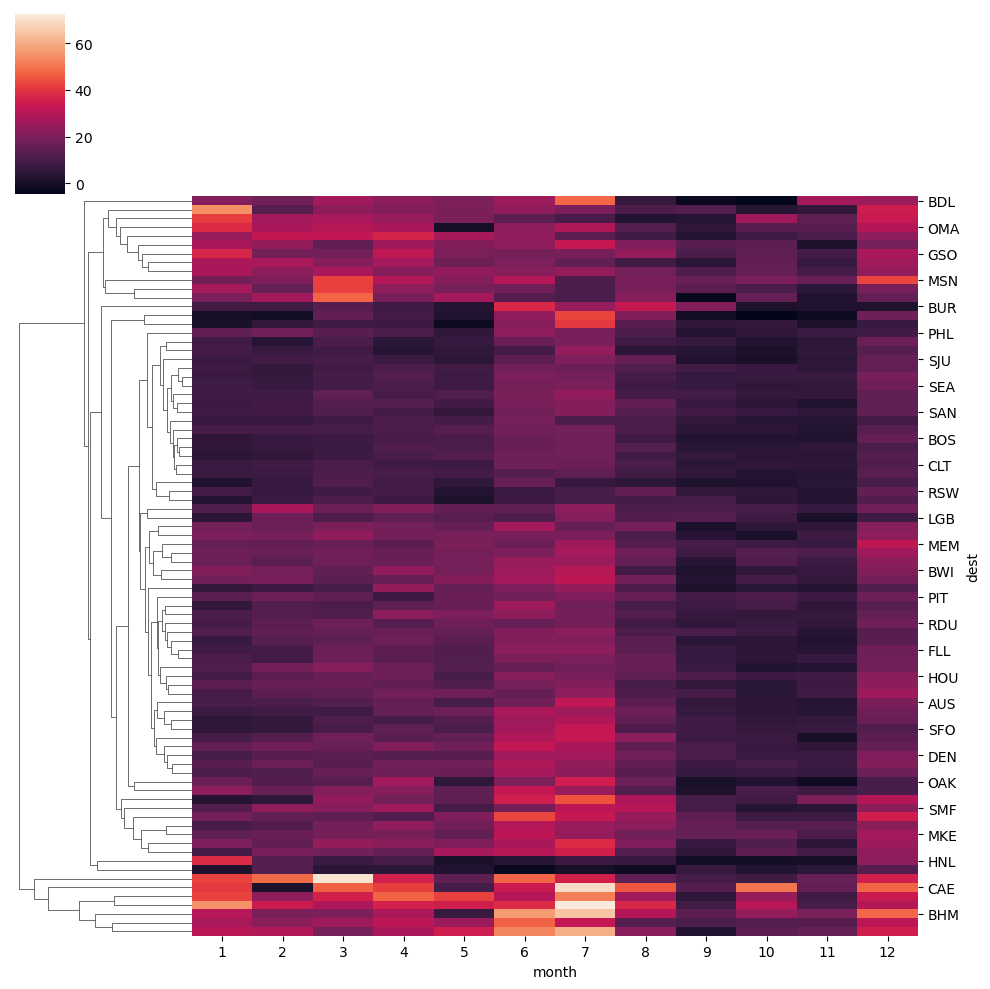

In [ ]:
# convert to a wide format
dest_dep_delay_wide = dest_dep_delay.pivot(index="dest", columns="month", values="mean")

sns.clustermap(dest_dep_delay_wide, col_cluster=False)